# <center>**Trabajo Práctico Número 2**</center>

### <center>**Regresión del valor de valor medio de casas en distritos de California**</center>

#### <center>Introducción a la Inteligencia Artificial - CEIA & DPLN, Fiuba</center>

<center><img width="35%" src="https://lh5.googleusercontent.com/cPAoMij8-mRhQEFe6cf2R1bncilBk29i0DaUS7EkqUcLb4IdcbjCUaBXcU9k-T59JJDuOkvsB_PDdKa0F3Q54_sAdIi_4tNK5oHYmT20OLV64mFLoiq2G2L-9ihkDdgJSg=w1280"/></center>

---

**Integrantes del grupo**

- Argento, Lucas
- Espínola, Carla
- Gambarte, Antonella
- Putrino, Daniela
- Silvera, Ricardo

---


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


#### 1. Obtener la correlación entre los atributos y entre los atributos y el target.

1. ¿Qué atributo tiene mayor correlación lineal con el target?
2. ¿Cuáles atributos parecen estar más correlacionados entre sí? Se pueden calcular los coeficientes de correlación o representarlos gráficamente mediante un mapa de calor.


In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['MedHouseVal'] = data.target

features = list(set(df.columns) - set(['MedHouseVal']))

X = df[features]
y = df.MedHouseVal



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Como se puede observar, todos los atributos son del tipo numéricos por lo que no es necesario hacer ninguna conversión.

A continuación se muestra una descripción estadísticas de las características:


In [6]:
X.describe()

,Population,MedInc,HouseAge,Longitude,Latitude,AveOccup,AveBedrms,AveRooms
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,1425.476744,3.870671,28.639486,-119.569704,35.631861,3.070655,1.096675,5.429000
std,1132.462122,1.899822,12.585558,2.003532,2.135952,10.386050,0.473911,2.474173
min,3.000000,0.499900,1.000000,-124.350000,32.540000,0.692308,0.333333,0.846154
25%,787.000000,2.563400,18.000000,-121.800000,33.930000,2.429741,1.006079,4.440716
50%,1166.000000,3.534800,29.000000,-118.490000,34.260000,2.818116,1.048780,5.229129
75%,1725.000000,4.743250,37.000000,-118.010000,37.710000,3.282261,1.099526,6.052381
max,35682.000000,15.000100,52.000000,-114.310000,41.950000,1243.333333,34.066667,141.909091


Realizamos las gráficas entre las carácterísticas para poder visualizar alguna dependencia

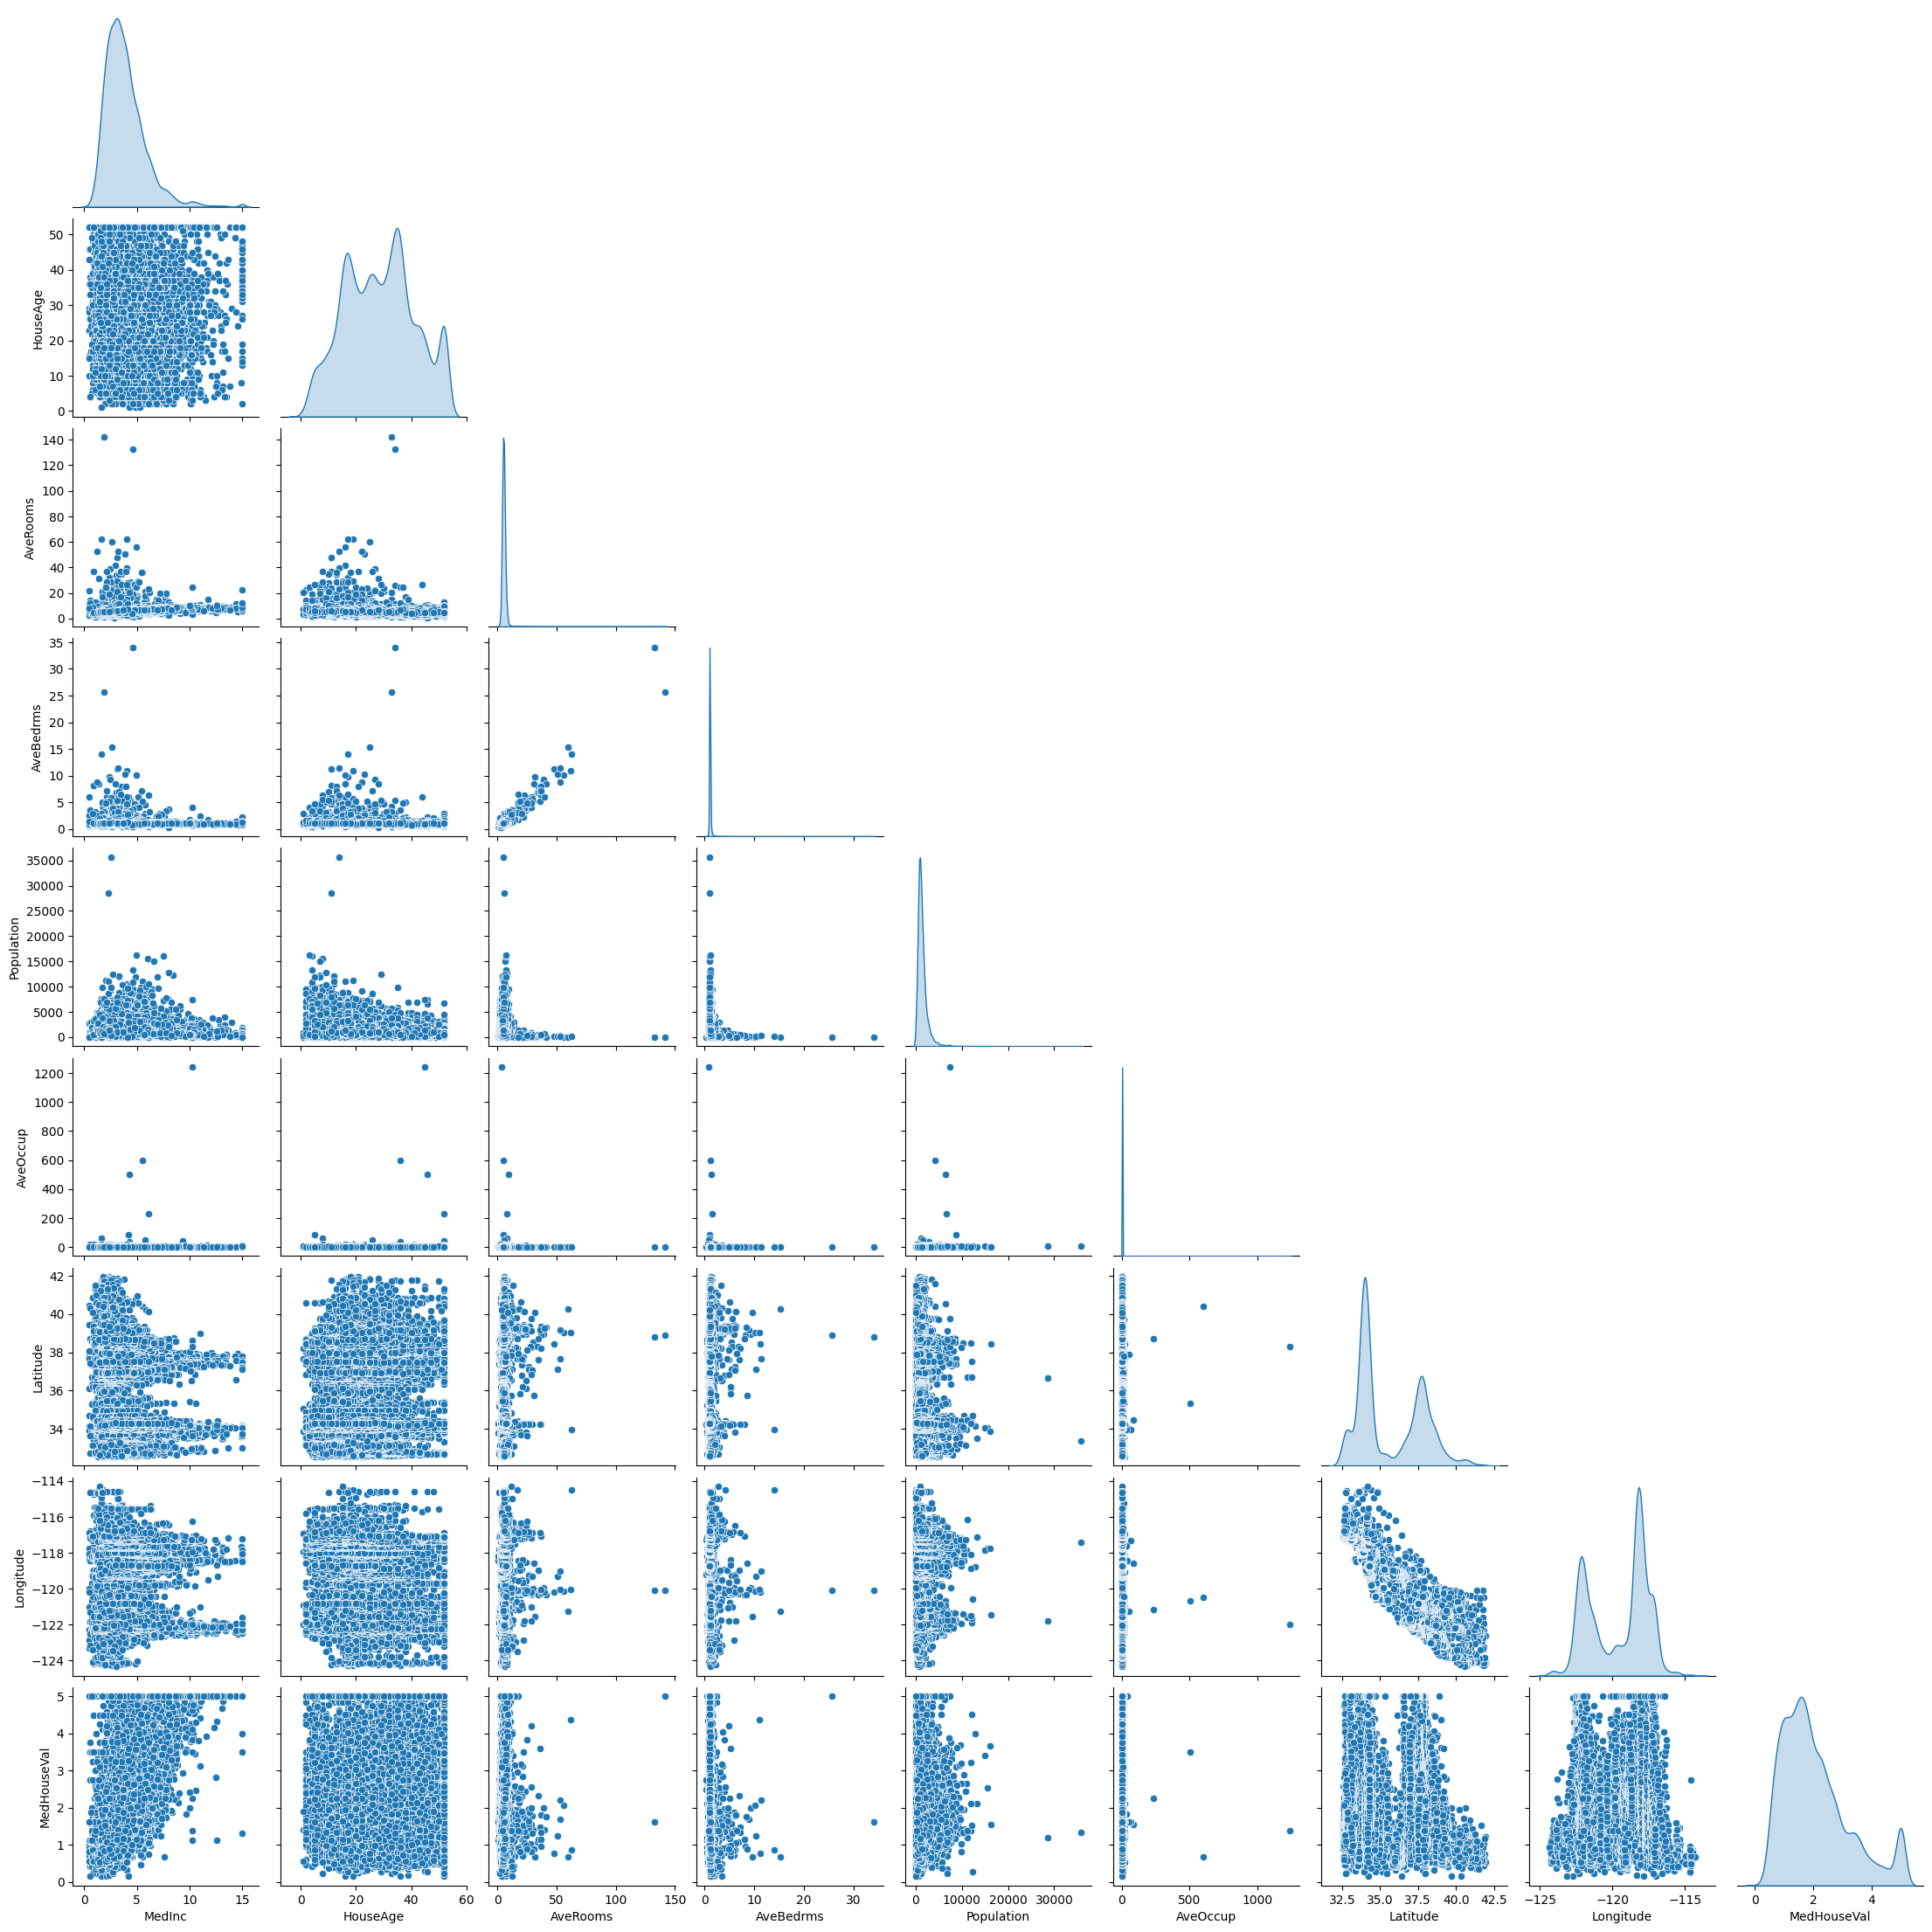

In [13]:
sns.pairplot(data=df, diag_kind="kde", corner=True)

#### Matriz de correlación


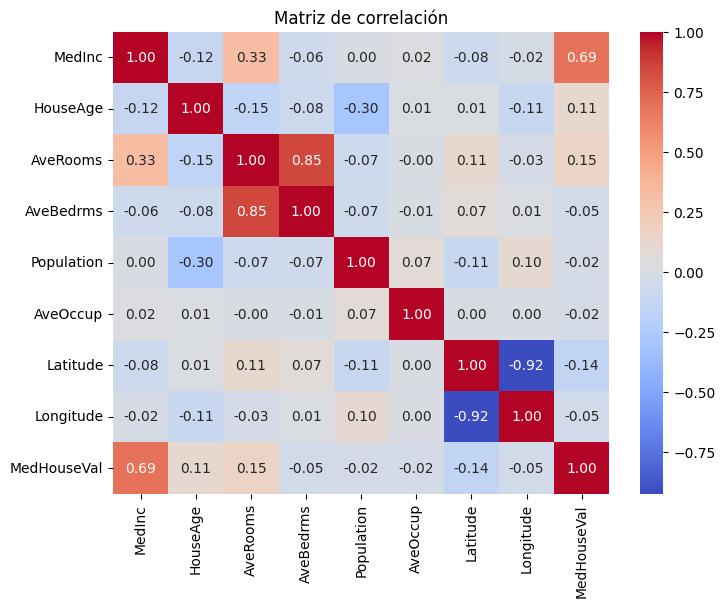

In [7]:
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f",cbar=True)
plt.title("Matriz de correlación")
plt.show()

Como se puede observar, el atributo que tiene mayor correlación lineal con el target es el ingreso medio (MedInc), lo que sugiere que a mayor ingreso medio, mayor es el valor de la vivienda.

En cuanto a los atributos, existe una correlación positiva entre número promedio de dormitorios y el número promedio de habitaciones, lo cual sugiere que si una casa tiene mas habitaciones probablemente tiene más dormitorios.

Además se observa una correlación negativa entre la latitud y la longitud, lo cual se da debido a la posición geográfica de California.


#### 2. Graficar los histogramas de los distintos atributos y del target. 

1. ¿Qué forma presentan los histogramas?

> **MedInc** tiene forma asimétrica a la derecha (sesgo positivo). Esto es dado que la mayoría de los distritos tiene ingresos medianos bajos, y unos pocos tienen ingresos muy altos.

> **HouseAge** tiene una forma multimodal. Los picos se deben a que hubo períodos en que la construcción fue muy prolífera en California; por ejemplo, luego de la Guerra Mundial o los proyectos de urbanización que se llevaron a cabo en algunas regiones. Sin embargo, en la muestra parece haber un límite para las casas que exceden los 52 años.

> **AveRooms** tiene forma sesgada a la derecha (cola larga). La mayoría de los hogares tiene pocas habitaciones promedio, pero algunos distritos tienen valores mucho más altos. Si acotamos la distribución a <10, se observa una aproximación a la normal.

> **AveBedrm** tiene forma sesgada a la derecha (cola larga). Valores extremadamente bajos en promedio.

> **Population** tiene forma sesgada a la derecha. La mayoría de los distritos tiene poblaciones pequeñas, pero hay algunos con poblaciones muy grandes.

> **AveOccup** tiene forma sesgada a la derecha con valores atípicos extremos. Puede haber distritos con ocupación muy alta (quizás zonas marginales, o errores de medición). Si acotamos la distribución a <6, se observa una aproximación a la normal.

> **Latitude** y **Longitude** tienen forma multimodal. Reflejan la geografía real de California, con concentración en áreas urbanas como Los Ángeles, San Francisco, San Diego.

> **MedHouseVal** tiene sesgo a la derecha con un corte abrupto en 5. El valor de 5 parece ser un límite impuesto en el dataset, lo cual hace que se concentren todos los valores mayores a 5 y acota la información.

2. ¿Alguno muestra una distribución similar a una campana que sugiera una distribución gaussiana, sin necesidad de realizar pruebas de hipótesis?


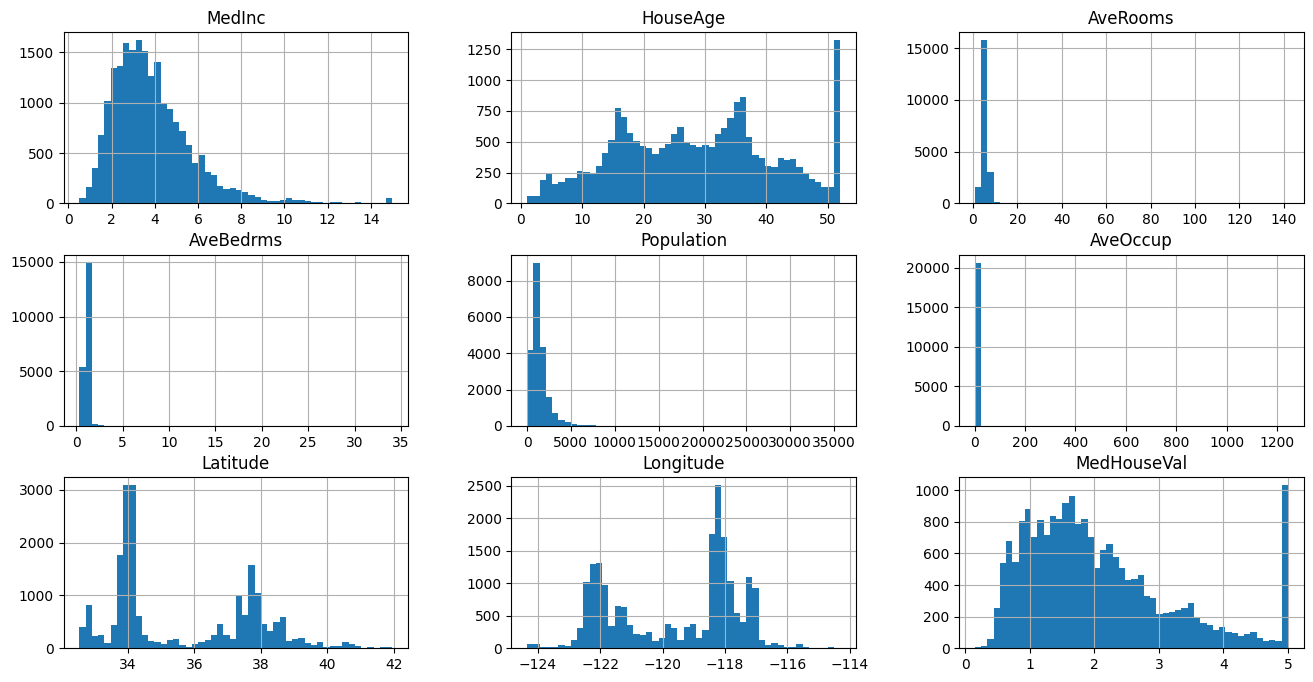

In [8]:
df.hist(bins=50,figsize=(16,8))
plt.show()

Para la mayoría de los distritos, la media de habitaciones tiene una distribución normal. Sin embargo, existen distritos donde la media de habitaciones es muy alta dado qxue hay distritos con universidades, zonas militares, etc. que aumentan el promedio de habitaciones del distrito.
Lo mismo se observa al acotar AveBedrms y AveOccup, dado que los distritos cuyos habitantes y convivientes promedio son más de 5 son muy anómalos. Así como también es extraño que haya distritos cuyo promedio de dormitorios sea mayor a 2.

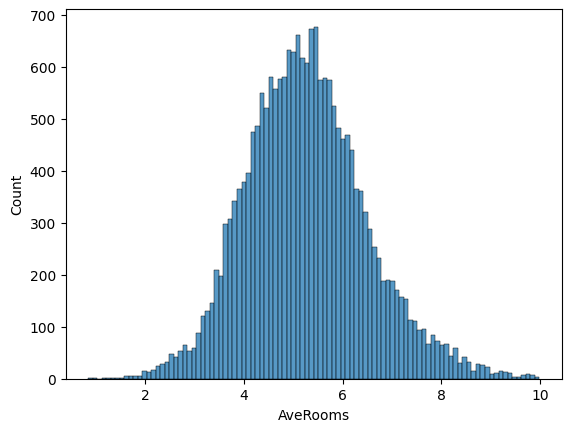

In [9]:
sns.histplot(data=df[df.AveRooms<10], x='AveRooms', bins=100)
plt.show()

(241, 9)
(20399, 9)


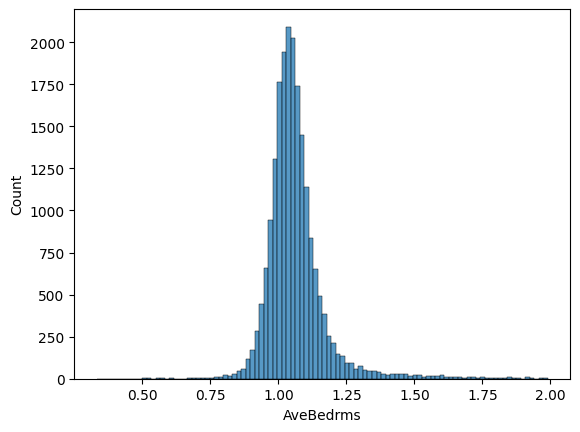

In [10]:
print(df[df.AveBedrms>=2].shape)
print(df[df.AveBedrms<2].shape)
sns.histplot(data=df[df.AveBedrms<2], x='AveBedrms', bins=100)
plt.show()

(115, 9)
(20525, 9)


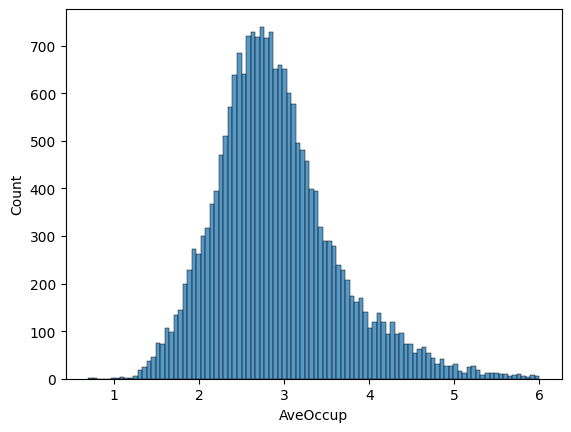

In [11]:
qty = 6
print(df[df.AveOccup>=qty].shape)
print(df[df.AveOccup<qty].shape)
sns.histplot(data=df[df.AveOccup<qty], x='AveOccup', bins=100)
plt.show()

#### 3. Calcular una regresión lineal utilizando todos los atributos. 

1. Con el conjunto de entrenamiento, calcular la varianza total del modelo y la varianza explicada por el modelo.
2. ¿Está el modelo capturando adecuadamente el comportamiento del target? Fundamente su respuesta.

In [24]:

#Dividimos los datos en etrenanmiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Datos de train y de test
print("Dimensión de X_train:",X_train.shape)
print("Valores de y_train:",y_train.size)
print("Dimensión de X_test:",X_test.shape)
print("Valores de y_test:",len(y_test))



Dimensión de X_train: (14448, 8)
Valores de y_train: 14448
Dimensión de X_test: (6192, 8)
Valores de y_test: 6192


In [28]:
#Escalamos los valores de las caracaterísticas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"La media del escalador es {np.round(scaler.mean_[0], 2)}")
print(f"El desvío estándar del escalador es {np.round(np.sqrt(scaler.var_[0]), 2)}")

#Convertimos a DataFrame de Pandas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

La media del escalador es 1427.93
El desvío estándar del escalador es 1140.19


In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Creamos el preprocesamiento para las columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('attribs', StandardScaler(), list(X_train.columns))    # Escalamos las variables numéricas
    ]
)

# Creamos el pipeline con preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Aplicamos la regresión lineal
])

pipeline

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('attribs', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [31]:
#Entrenar la regresión lineal

pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('attribs', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [32]:
print(f"El valor de la intersección de la recta es {np.round(pipeline.named_steps['regressor'].intercept_, 2)}")
print(f"Los valores de los coeficientes de la recta son {np.round(pipeline.named_steps['regressor'].coef_, 2)}")


El valor de la intersección de la recta es 2.07
Los valores de los coeficientes de la recta son [-0.    0.85  0.12 -0.87 -0.89 -0.04  0.35 -0.3 ]


In [34]:
pipeline.named_steps['preprocessor'].get_feature_names_out()

array(['attribs__Population', 'attribs__MedInc', 'attribs__HouseAge',
       'attribs__Longitude', 'attribs__Latitude', 'attribs__AveOccup',
       'attribs__AveBedrms', 'attribs__AveRooms'], dtype=object)

#### 4. Calcular las métricas de MSE, MAE y R² sobre el conjunto de evaluación.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = pipeline.predict(X_test)

# 3. Calcular métricas
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

R²: 0.5958
MSE: 0.5306
MAE: 0.5272


#### 5. Crear una regresión de Ridge. 

1. Usar validación cruzada de 5 folds y tomar como métrica el MSE.
2. Buscar el mejor valor de α en el rango [0, 12.5].
3. Graficar el MSE en función de α.

#### 6. Comparar los resultados obtenidos entre la regresión lineal y la mejor regresión de Ridge, evaluando el conjunto de prueba.

1. ¿Cuál de los dos modelos obtiene mejores resultados en términos de MSE y MAE? ¿Poseen suficiente diferencia como para indicar si uno es mejor que el otro?
2. ¿Qué tipo de error podría haberse reducido?